# Importando as Bibliotecas Necessárias

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import convolve
import colorsys
import os

# Questão 1:
# Juntando as Imagens Horizontalmente

In [80]:
def combine_images(image_folder, output_folder, output_filename):
    """
    Combines multiple images from a folder into a single image.

    Args:
        image_folder: The relative path to the folder containing images.
        output_folder: The folder where the combined image will be saved.
        output_filename: The name of the output combined image file.
    """
    images = []
    
    os.makedirs(output_folder, exist_ok=True)

    try:
        for filename in os.listdir(image_folder):
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                image_path = os.path.join(image_folder, filename)
                try:
                    img = Image.open(image_path)
                    images.append(img)
                except Exception as e:
                    print(f"Erro ao abrir a imagem {filename}: {e}")
    except FileNotFoundError:
        print(f"Erro: Pasta '{image_folder}' não encontrada.")
        return
    except Exception as e:
        print(f"Ocorreu um erro ao listar os arquivos: {e}")
        return

    if not images:
        print(f"Nenhuma imagem encontrada na pasta '{image_folder}'.")
        return

    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    combined_image = Image.new("RGB", (total_width, max_height), (255, 255, 255))

    x_offset = 0
    for img in images:
        combined_image.paste(img, (x_offset, 0))
        x_offset += img.width

    output_path = os.path.join(output_folder, output_filename)

    try:
        combined_image.save(output_path)
        print(f"Imagem combinada salva em: {output_path}")
    except Exception as e:
        print(f"Erro ao salvar a imagem combinada: {e}")

    try:
        combined_image.show()
    except Exception as e:
        print(f"Erro ao exibir a imagem: {e}")

image_folder = "img"
output_folder = "questao 1"
output_filename = "final_combined_image.jpg" 

combine_images(image_folder, output_folder, output_filename)


Imagem combinada salva em: questao 1\final_combined_image.jpg


# Questao 2:
# Trocando as cores dos Pinguins

In [81]:
def trocar_cor_completa(imagem, cor_nova):
    """
    Altera a cor do pinguim preservando o sombreamento.
    """
    imagem = imagem.convert("RGB")
    pixels = imagem.load()
    
    r_novo, g_novo, b_novo = cor_nova
    h_novo, s_novo, v_novo = colorsys.rgb_to_hsv(r_novo / 255, g_novo / 255, b_novo / 255)
    
    for i in range(imagem.width):
        for j in range(imagem.height):
            r, g, b = pixels[i, j]
            
            h, s, v = colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)
            
            r_final, g_final, b_final = colorsys.hsv_to_rgb(h_novo, s, v)
            
            pixels[i, j] = (int(r_final * 255), int(g_final * 255), int(b_final * 255))
    
    return imagem

def combine_images(image_folder, output_folder, output_filename, cores_novas):
    """
    Combina várias imagens de uma pasta em uma única imagem, e altera a cor dos pinguins.
    Cada pinguim recebe uma cor diferente.
    """
    imagens = []
    try:
        for filename in os.listdir(image_folder):
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                image_path = os.path.join(image_folder, filename)
                try:
                    img = Image.open(image_path)
                    cor_nova = cores_novas[len(imagens) % len(cores_novas)]
                    img_modificada = trocar_cor_completa(img, cor_nova)
                    imagens.append(img_modificada)
                except Exception as e:
                    print(f"Erro ao abrir a imagem {filename}: {e}")
    except FileNotFoundError:
        print(f"Erro: Pasta não encontrada em {image_folder}")
        return
    except Exception as e:
        print(f"Erro ao listar os arquivos: {e}")
        return

    if not imagens:
        print(f"Nenhuma imagem encontrada na pasta '{image_folder}'.")
        return

    largura_total = sum(img.width for img in imagens)
    altura_maxima = max(img.height for img in imagens)

    imagem_combinada = Image.new("RGB", (largura_total, altura_maxima), (255, 255, 255))

    x_offset = 0
    for img in imagens:
        imagem_combinada.paste(img, (x_offset, 0))
        x_offset += img.width

    os.makedirs(output_folder, exist_ok=True)

    output_path = os.path.join(output_folder, output_filename)

    try:
        imagem_combinada.save(output_path)
        print(f"Imagem combinada salva como {output_path}")
    except Exception as e:
        print(f"Erro ao salvar a imagem: {e}")
    
    try:
        imagem_combinada.show()
    except Exception as e:
        print(f"Erro ao mostrar a imagem: {e}")

pasta_imagens = "img"
pasta_saida = "questao 2" 
nome_arquivo_saida = "final_combined_image_color_changed.jpg"
cores_novas = [
    (100, 175, 0),  # Verde
    (0, 0, 175),    # Azul
    (175, 0, 50),   # Rosa
    (255, 255, 0)   # Amarelo
]

combine_images(pasta_imagens, pasta_saida, nome_arquivo_saida, cores_novas)


Imagem combinada salva como questao 2\final_combined_image_color_changed.jpg


# Questão 3:
# Aplicando o espelhamento

In [82]:
def trocar_cor_completa(imagem, cor_nova):
    """
    Altera a cor do pinguim preservando o sombreamento.
    """
    imagem = imagem.convert("RGB")
    pixels = imagem.load()
    
    r_novo, g_novo, b_novo = cor_nova
    h_novo, s_novo, v_novo = colorsys.rgb_to_hsv(r_novo / 255, g_novo / 255, b_novo / 255)
    
    for i in range(imagem.width):
        for j in range(imagem.height):
            r, g, b = pixels[i, j]
            
            h, s, v = colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)
            
            r_final, g_final, b_final = colorsys.hsv_to_rgb(h_novo, s, v)
            
            pixels[i, j] = (int(r_final * 255), int(g_final * 255), int(b_final * 255))
    
    return imagem

def combine_images(image_folder, output_folder, output_filename, cores_novas):
    """
    Combina várias imagens de uma pasta em uma única imagem, e altera a cor dos pinguins.
    Cada pinguim recebe uma cor diferente.
    """
    imagens = []
    try:
        for filename in os.listdir(image_folder):
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                image_path = os.path.join(image_folder, filename)
                try:
                    img = Image.open(image_path)
                    cor_nova = cores_novas[len(imagens) % len(cores_novas)]
                    img_modificada = trocar_cor_completa(img, cor_nova)
                    imagens.append(img_modificada)
                except Exception as e:
                    print(f"Erro ao abrir a imagem {filename}: {e}")
    except FileNotFoundError:
        print(f"Erro: Pasta não encontrada em {image_folder}")
        return
    except Exception as e:
        print(f"Erro ao listar os arquivos: {e}")
        return

    if not imagens:
        print(f"Nenhuma imagem encontrada na pasta '{image_folder}'.")
        return

    largura_total = sum(img.width for img in imagens)
    altura_maxima = max(img.height for img in imagens)

    imagem_combinada = Image.new("RGB", (largura_total, altura_maxima), (255, 255, 255))

    x_offset = 0
    for img in imagens:
        imagem_combinada.paste(img, (x_offset, 0))  
        x_offset += img.width

    imagem_combinada = imagem_combinada.transpose(Image.FLIP_LEFT_RIGHT)

    os.makedirs(output_folder, exist_ok=True)

    output_path = os.path.join(output_folder, output_filename)

    try:
        imagem_combinada.save(output_path)
        print(f"Imagem combinada e espelhada salva como {output_path}")
    except Exception as e:
        print(f"Erro ao salvar a imagem: {e}")
    
    try:
        imagem_combinada.show()
    except Exception as e:
        print(f"Erro ao mostrar a imagem: {e}")

pasta_imagens = "img"
pasta_saida = "questao 3"
nome_arquivo_saida = "final_combined_image_mirrored.jpg"
cores_novas = [
    (100, 175, 0),  # Verde
    (0, 0, 175),    # Azul
    (175, 0, 50),   # Rosa
    (255, 255, 0)   # Amarelo
]

combine_images(pasta_imagens, pasta_saida, nome_arquivo_saida, cores_novas)


Imagem combinada e espelhada salva como questao 3\final_combined_image_mirrored.jpg


# questão 4:
# Recortando o pinguim escolhido

In [83]:
def trocar_cor_completa(imagem, cor_nova):
    """
    Altera a cor do pinguim preservando o sombreamento.
    """
    imagem = imagem.convert("RGB") 
    pixels = imagem.load()
    
    r_novo, g_novo, b_novo = cor_nova
    h_novo, s_novo, v_novo = colorsys.rgb_to_hsv(r_novo / 255, g_novo / 255, b_novo / 255)
    
    for i in range(imagem.width):
        for j in range(imagem.height):
            r, g, b = pixels[i, j]
            
            h, s, v = colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)
            
            r_final, g_final, b_final = colorsys.hsv_to_rgb(h_novo, s, v)
            
            pixels[i, j] = (int(r_final * 255), int(g_final * 255), int(b_final * 255))
    
    return imagem

def recortar_pinguim_rosado(imagem):
    """
    Detecta e recorta a área do pinguim rosa com base na cor.
    Aumenta o tamanho do corte para os quatro lados.
    """
    img_array = np.array(imagem)
    
    cor_rosada_min = np.array([150, 0, 30])
    cor_rosada_max = np.array([200, 50, 100])
    
    mascara_rosada = np.all((img_array >= cor_rosada_min) & (img_array <= cor_rosada_max), axis=-1)
    
    coords = np.column_stack(np.where(mascara_rosada))
    
    if coords.size == 0:
        print("Nenhum pinguim rosa encontrado!")
        return None
    
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    
    margem = 30
    x_min = max(x_min - margem, 0)
    x_max = min(x_max + margem, img_array.shape[1])
    y_min = max(y_min - margem, 0)
    y_max = min(y_max + margem, img_array.shape[0])
    
    img_recortada = imagem.crop((x_min, y_min, x_max, y_max))
    
    return img_recortada

def combine_images(image_folder, output_folder, output_filename, cores_novas):
    """
    Combina várias imagens de uma pasta em uma única imagem, e altera a cor dos pinguins.
    Cada pinguim recebe uma cor diferente.
    """
    imagens = []
    try:
        for filename in os.listdir(image_folder):
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                image_path = os.path.join(image_folder, filename)
                try:
                    img = Image.open(image_path)
                    cor_nova = cores_novas[len(imagens) % len(cores_novas)]  
                    img_modificada = trocar_cor_completa(img, cor_nova)
                    imagens.append(img_modificada)
                except Exception as e:
                    print(f"Erro ao abrir a imagem {filename}: {e}")
    except FileNotFoundError:
        print(f"Erro: Pasta não encontrada em {image_folder}")
        return
    except Exception as e:
        print(f"Erro ao listar os arquivos: {e}")
        return

    if not imagens:
        print(f"Nenhuma imagem encontrada na pasta '{image_folder}'.")
        return

    largura_total = sum(img.width for img in imagens)
    altura_maxima = max(img.height for img in imagens)

    imagem_combinada = Image.new("RGB", (largura_total, altura_maxima), (255, 255, 255))

    x_offset = 0
    for img in imagens:
        imagem_combinada.paste(img, (x_offset, 0))  
        x_offset += img.width

    imagem_combinada = imagem_combinada.transpose(Image.FLIP_LEFT_RIGHT)

    imagem_recortada = recortar_pinguim_rosado(imagem_combinada)

    if imagem_recortada is None:
        print("Não foi possível recortar o pinguim rosa!")
        return

    os.makedirs(output_folder, exist_ok=True)

    output_path = os.path.join(output_folder, output_filename)

    try:
        imagem_recortada.save(output_path)
        print(f"Imagem recortada salva como {output_path}")
    except Exception as e:
        print(f"Erro ao salvar a imagem recortada: {e}")
    
    try:
        imagem_recortada.show()
    except Exception as e:
        print(f"Erro ao mostrar a imagem recortada: {e}")

pasta_imagens = "img"  
pasta_saida = "questao 4"  
nome_arquivo_saida = "pinguim_rosa_recortado.jpg"
cores_novas = [
    (100, 175, 0),  # Verde
    (0, 0, 175),    # Azul
    (175, 0, 50),   # Rosa
    (255, 255, 0)   # Amarelo
]

combine_images(pasta_imagens, pasta_saida, nome_arquivo_saida, cores_novas)


Imagem recortada salva como questao 4\pinguim_rosa_recortado.jpg


# Questão 5:
# Criando o histograma do pinguim favorito 

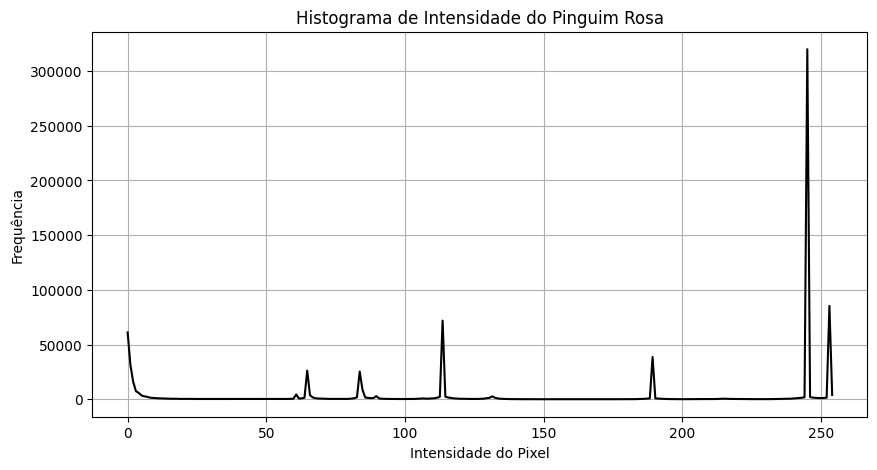

Threshold sugerido: 100
Imagem segmentada salva em: questao 5\pinguim_rosa_segmentado.jpg


In [84]:
def analisar_histograma(imagem):
    """
    Analisa o histograma de uma imagem e retorna o valor de threshold com base na distribuição.
    """
    imagem_gray = imagem.convert("L")
    
    img_array = np.array(imagem_gray)
    
    hist, bins = np.histogram(img_array, bins=256, range=(0, 255))
    
    plt.figure(figsize=(10, 5))
    plt.plot(bins[:-1], hist, color="black")
    plt.title("Histograma de Intensidade do Pinguim Rosa")
    plt.xlabel("Intensidade do Pixel")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()
    
    threshold = 100  
    print(f"Threshold sugerido: {threshold}")
    
    return threshold

def segmentar_pinguim_por_threshold(imagem, threshold):
    """
    Segmentar o pinguim rosa com base no threshold escolhido.
    """
    imagem_gray = imagem.convert("L")  
    img_array = np.array(imagem_gray)
    
    img_array_thresholded = np.where(img_array > threshold, 255, 0).astype(np.uint8)
    
    imagem_segmentada = Image.fromarray(img_array_thresholded)
    return imagem_segmentada

pasta_questao4 = "questao 4"
caminho_imagem_recortada = os.path.join(pasta_questao4, "pinguim_rosa_recortado.jpg")  

pasta_questao5 = "questao 5"
os.makedirs(pasta_questao5, exist_ok=True)

if not os.path.exists(caminho_imagem_recortada):
    print(f"Erro: A imagem '{caminho_imagem_recortada}' não foi encontrada!")
else:
    imagem_recortada = Image.open(caminho_imagem_recortada)

    threshold = analisar_histograma(imagem_recortada)

    imagem_segmentada = segmentar_pinguim_por_threshold(imagem_recortada, threshold)

    caminho_saida = os.path.join(pasta_questao5, "pinguim_rosa_segmentado.jpg")
    imagem_segmentada.save(caminho_saida)

    print(f"Imagem segmentada salva em: {caminho_saida}")

    imagem_segmentada.show()


# Questao 6:
# Convertendo para que todos os pixeis abaixo dele sejam pintados de outra cor

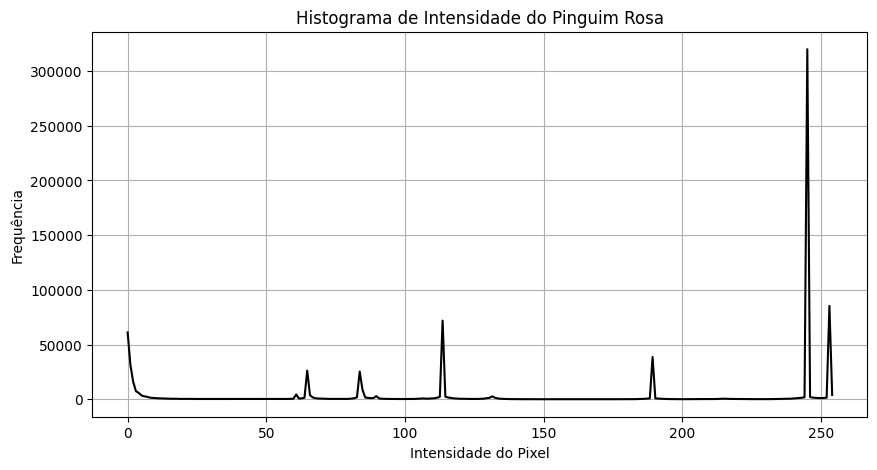

Threshold sugerido: 100
Imagem modificada salva em: questao 6\pinguim_rosa_roxo.jpg


In [85]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

def analisar_histograma(imagem):
    """
    Analisa o histograma de uma imagem e retorna o valor de threshold com base na distribuição.
    """
    imagem_gray = imagem.convert("L")  
    img_array = np.array(imagem_gray)
    
    hist, bins = np.histogram(img_array, bins=256, range=(0, 255))

    plt.figure(figsize=(10, 5))
    plt.plot(bins[:-1], hist, color="black")
    plt.title("Histograma de Intensidade do Pinguim Rosa")
    plt.xlabel("Intensidade do Pixel")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()
    
    threshold = 100  
    print(f"Threshold sugerido: {threshold}")
    
    return threshold

def pintar_pixels_abaixo_do_threshold(imagem, threshold, cor=(128, 0, 128)):
    """
    Pinta de roxo todos os pixels abaixo do threshold.
    """
    imagem_rgb = imagem.convert("RGB")  
    img_array = np.array(imagem_rgb)

    imagem_gray = imagem.convert("L")
    gray_array = np.array(imagem_gray)

    mascara = gray_array < threshold

    img_array[mascara] = cor

    imagem_final = Image.fromarray(img_array)
    return imagem_final

pasta_questao4 = "questao 4"
caminho_imagem_recortada = os.path.join(pasta_questao4, "pinguim_rosa_recortado.jpg")  

pasta_questao6 = "questao 6"
os.makedirs(pasta_questao6, exist_ok=True)

if not os.path.exists(caminho_imagem_recortada):
    print(f"Erro: A imagem '{caminho_imagem_recortada}' não foi encontrada!")
else:
    imagem_recortada = Image.open(caminho_imagem_recortada)

    threshold = analisar_histograma(imagem_recortada)

    imagem_pintada = pintar_pixels_abaixo_do_threshold(imagem_recortada, threshold, cor=(128, 0, 128))

    caminho_saida = os.path.join(pasta_questao6, "pinguim_rosa_roxo.jpg")
    imagem_pintada.save(caminho_saida)

    print(f"Imagem modificada salva em: {caminho_saida}")

    imagem_pintada.show()
